# 1- Introduction

## 1.a- Problem

Everyone genuflects to the concept of wine quality. But when comes to defining precisely what that means there is often silence. For most wine critics, quality refers to what they personally consider ‘good’ versus ‘bad’ wine, and correspondingly desirable versus aversive. This is usually framed within the context of conformity relative to established, learned norms for the wines concerned. This indicates, and rightly so, that quality is not only subjective, but also involves both intrinsic (sensory) and extrinsic (contextural) components.

For the purist, only sensory inputs should be involved. Because we are primarily creatures of sight, visual characteristics of the wine can, and usually do, almost subversively bias our perception of a wine’s fragrance and taste. Thus, true aficionados prefer to sample their wines knowing nothing about its origin and in officially standardized (ISO) black, wine tasting glasses. Quality is assessed only on those attributes that the wine communicates to our senses of smell and taste – just what is in the glass.

In this analysis, we want to predict wine quality with its sensory inputs as a practical and easy way.



Additional notes:

When to Ignore Wine Tasting Notes
There are specific reasons why it can better to ignore wine tasting notes, or at least read them with a grain of salt. They don't apply 100% of the time with 100% of wine drinkers, but they are at least issues you should take into account whenever you see wine tasting notes.

Tasting Notes can Prejudice or Influence Your Perception
It's easy to prejudice or influence people's perception of almost anything, and even without trying very hard. You may not realize it consciously, but commentary and reviews you've seen about movies, food, books, and even other people will become part of an unconscious filter through which all new experiences and information flow. You can't help it and you can't avoid it, so descriptions you read about a wine will cause you to experience that wine differently than you would have had you read nothing at all. This isn't always bad, since a reference to "strawberry notes" might help you recognize the very subtle strawberry flavors in the background, but it's not something you want let get out of hand either.

Tasting Notes Can Set You Up for Failure
Most tasting notes in wine reviews are written by people with a lot of knowledge about and experience with wines — or at least probably more knowledge and experience than you have. These wine drinkers have developed the ability to pick out subtle flavors and aromas in wines which may not be readily apparent to the average wine drinker. So if you read about "strawberry notes" yet are unable to detect anything remotely like strawberries — and consistently have similar experiences when drinking a wine after reading an expert's tasting notes — you might start thinking of yourself as a "failure" when it comes to drinking wine. You aren't, though, and don't need to such discouragement.

Tasting Notes Can Be Overwritten and Too Complicated
Wines may not all taste alike, but coming up with different words and phrases to express subtle differences in flavor or aroma can be difficult. Add to this the fact that the average wine reviewer or writer might be trying to write scores of wine tasting notes in any given year, and you can just imagine how difficult it will get for even an excellent writer. As a result, the descriptions wine reviewers write end up using all sorts of flowery, complicated language just to avoid writing the exact same descriptions over and over. This isn't very helpful to newer and less experienced wine drinkers.

## 1.b - Dataset


In order to solve our problem we will try to establish a model with using a set of observations on a number of white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. Only white wine data is analysed. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

# 2- Preperations

In [95]:
# We have two different data set with same features.
# Data sets obtained as plain text files from UC Irvine Machine Learning Repository!
# link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

# After downloading the text files, they were converted to csv files
# Loaded with pandas with the delimeter of ';'.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from matplotlib import rcParams

In [7]:
pwd

'/Users/onlyone/github/capstone_projects/capstone_project_1'

In [9]:
wine=pd.read_csv('05_winequality-white.csv', delimiter=';')

# 3- Data Understanding / Inspection

In [10]:
wine.shape

(4898, 12)

In [11]:
wine.index

RangeIndex(start=0, stop=4898, step=1)

In [12]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [15]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
wine.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [17]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
plt.savefig('winedataset')

<Figure size 432x288 with 0 Axes>

In [13]:
# what is the relationship between each features and our target variable (response value)
# we can figure out this with a simple plot for each features, which shows the linear relation
# we can make this with plotting 1 figure for each, but a single figure will be useful for practical using
# let's try to establish a subplot series 

# 3- Exploratory Data Analysis (EDA)

## 3.1- Distribution Histograms 

to show the distribution of the variable values

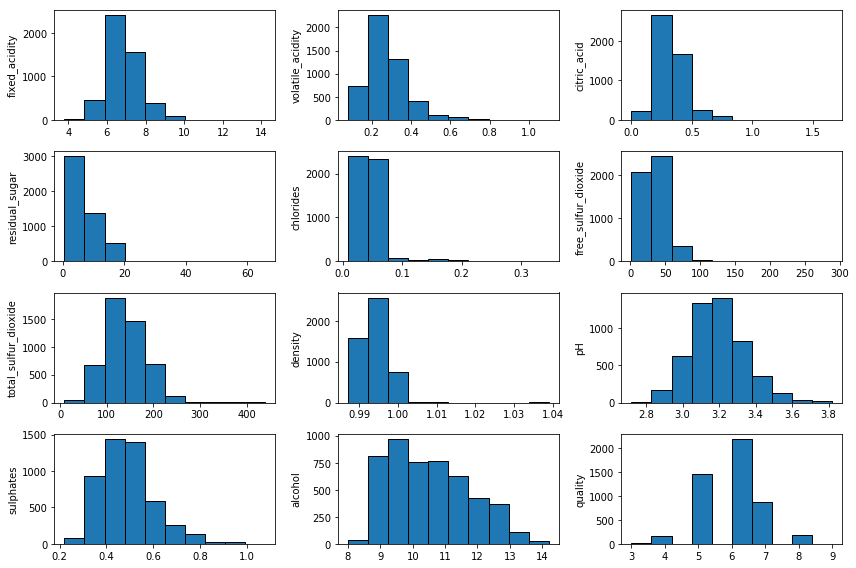

In [15]:
fig1, axes = plt.subplots(4,3, figsize=[12,8]) # create figure and axes

for i,clm in enumerate(list(wine.columns.values)):
    plt.subplot(4,3,i+1)
    plt.hist(wine[clm], edgecolor='k')
    plt.ylabel(clm)

plt.tight_layout() 
plt.show()
fig1.savefig('Distribution Histograms')

/Users/onlyone/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/onlyone/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/onlyone/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/onlyone/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/onlyone/anaconda3/lib

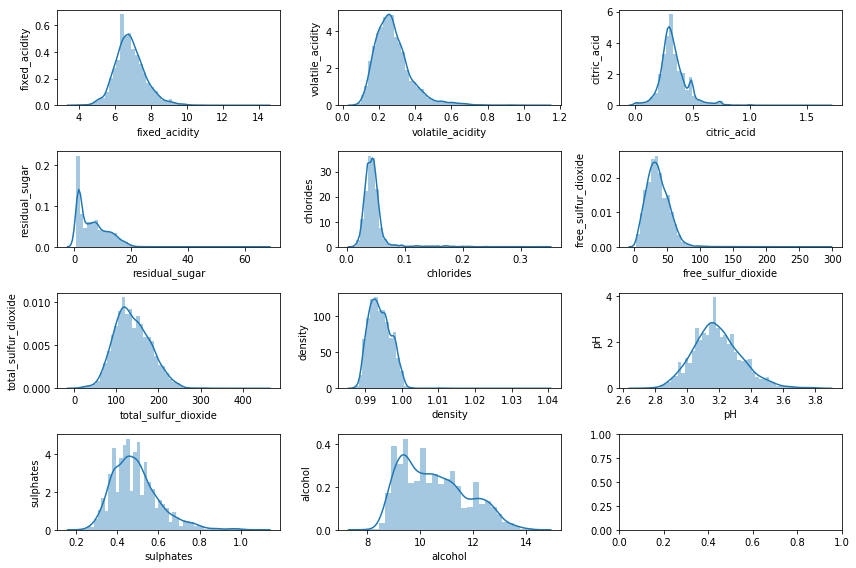

In [16]:
fig1, axes = plt.subplots(4,3, figsize=[12,8]) # create figure and axes

for i,clm in enumerate(list(wine.columns.values)[:-1]):
    plt.subplot(4,3,i+1)
    sns.distplot(wine[clm])
    plt.ylabel(clm)

plt.tight_layout() 
plt.show()

fig1.savefig('Distribution Curves')

## 3.2- Scatter plot 

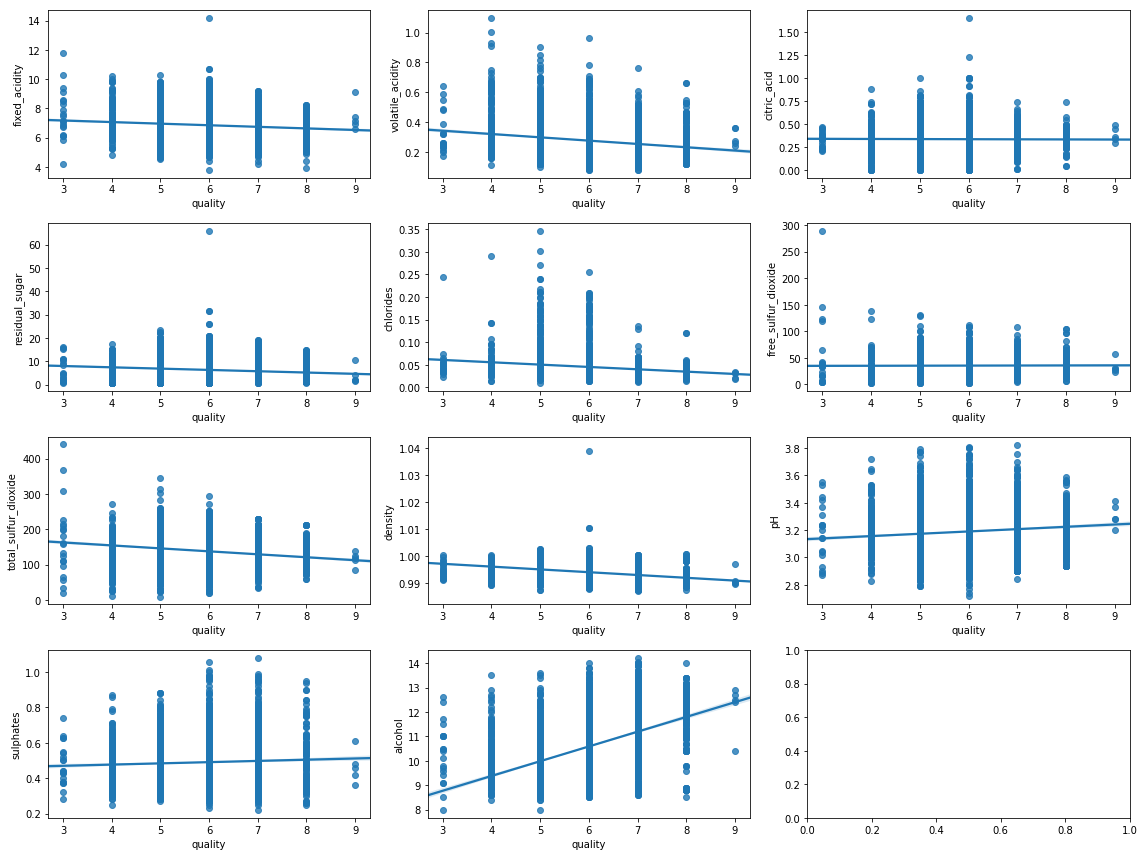

In [17]:
fig, axes = plt.subplots(4,3, figsize=[16,12]) # create figure and axes

for i,clm in enumerate(list(wine.columns.values)[:-1]):
    plt.subplot(4,3,i+1)
    sns.regplot(y=clm, x='quality', data=wine, fit_reg = True)
    plt.ylabel(clm)

plt.tight_layout() 
plt.show()

fig.savefig('Scatter Plots')

### Comments on scatter plot :
Scatter plot is one of the way to make a comparision and to understand the distribution of the data. But it has some drawbacks here. For instance, in this data set, our target value is integer and it is used for each plot in order to make a comparison between the target variable and rest of the other variables. The problem with the integer variables is that one of the axes of the plot has constant values and this makes you unable to understand the density of the specific values. In other words when you see a solid line, you can not be sure that whether there are 50 points or 500 points under that solid line. So it is a problem.

Seaborn Scatter plot has same drawbacks with the matplotlob one but it compansates some of these drawbacks with using a linear line which gives a critical clue about the relatiobship between the compared variables. 
For example let's compare two plots, "alcohol-quality" and  "pH-quality", in order to understand the power of linear model. When you just look at the points both plots looks very close to eachother. But linear lines show that how they are different. While alcohol has a significant positive relationship between quality, "pH" does not.

So what, we have now a better understanding of the influences of the features on the quality by means of seaborn scatter plot. Positive relationship between the "alcohol" and the quality is cleearly visible.

## 3.3- Violin plot

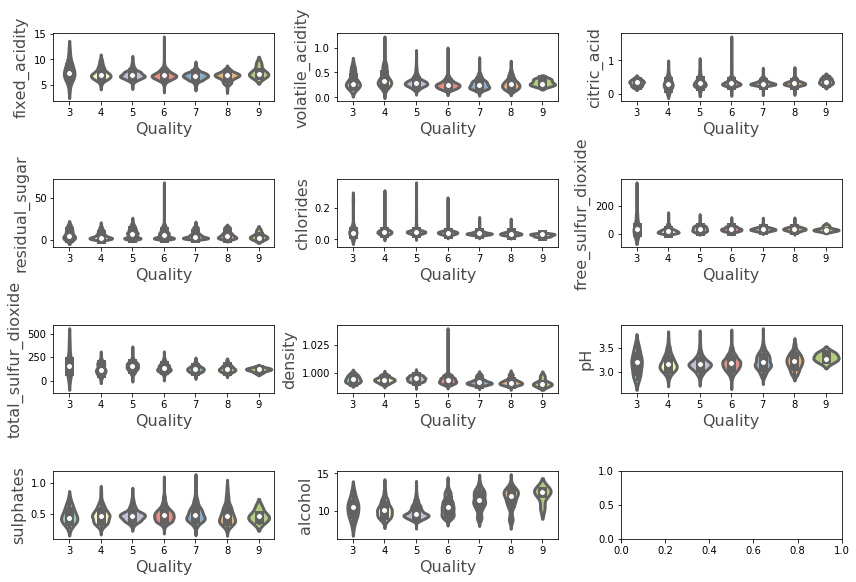

In [29]:
fig2, axes = plt.subplots(4,3, figsize=[12,8]) # create figure and axes

for i,clm in enumerate(list(wine.columns.values)[:-1]):
    plt.subplot(4,3,i+1)
    sns.violinplot(x="quality",y=clm,data=wine, inner="box", palette="Set3", cut=2, linewidth=3)
    plt.xlabel("Quality",size = 16,alpha=0.7)
    plt.ylabel('{}'.format(clm),size = 16,alpha=0.7)

plt.tight_layout() 
plt.show()

fig2.savefig('Violin Plot')

## 3.4 - Box plot

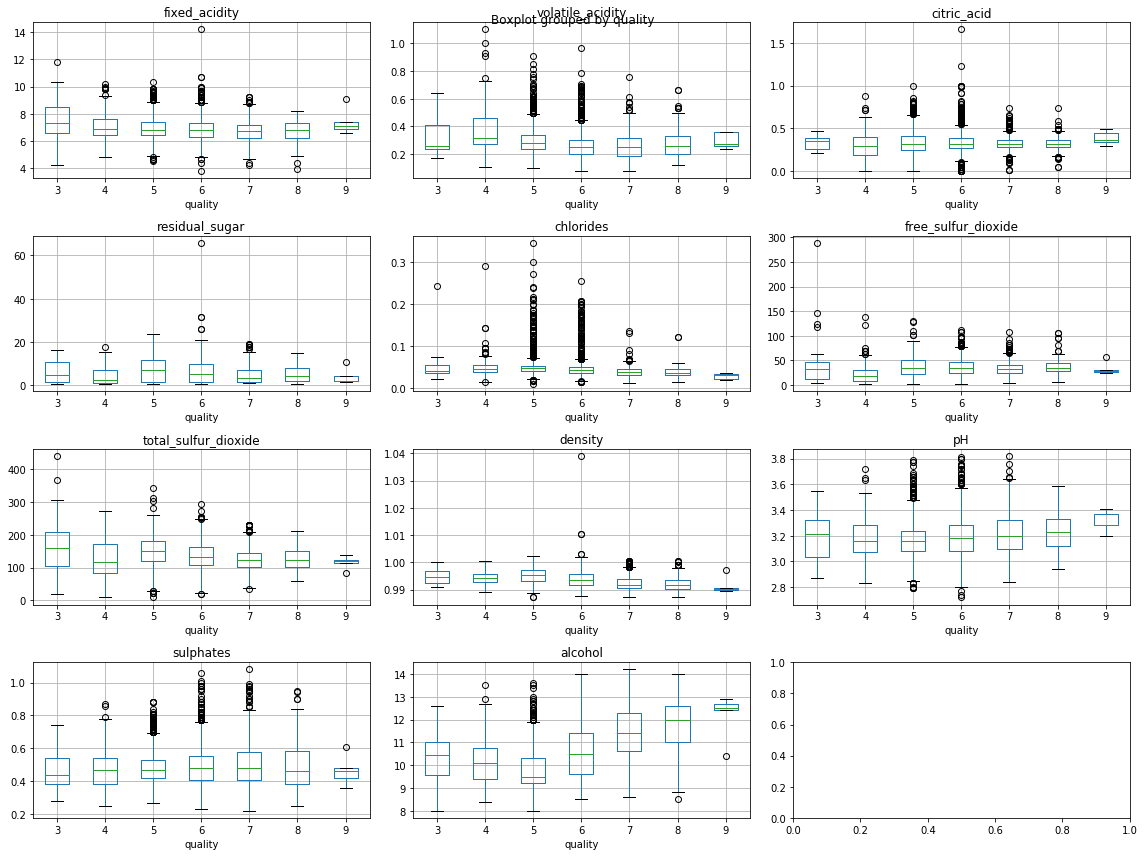

In [20]:
fig, axes = plt.subplots(4,3, figsize=[16,12]) # create figure and axes

for i,el in enumerate(list(wine.columns.values)[:-1]):
    a = wine.boxplot(el, by="quality", ax=axes.flatten()[i])

plt.tight_layout() 
plt.show()

fig.savefig('Box Plots')

## 3.5- Correlations

<Figure size 432x288 with 0 Axes>

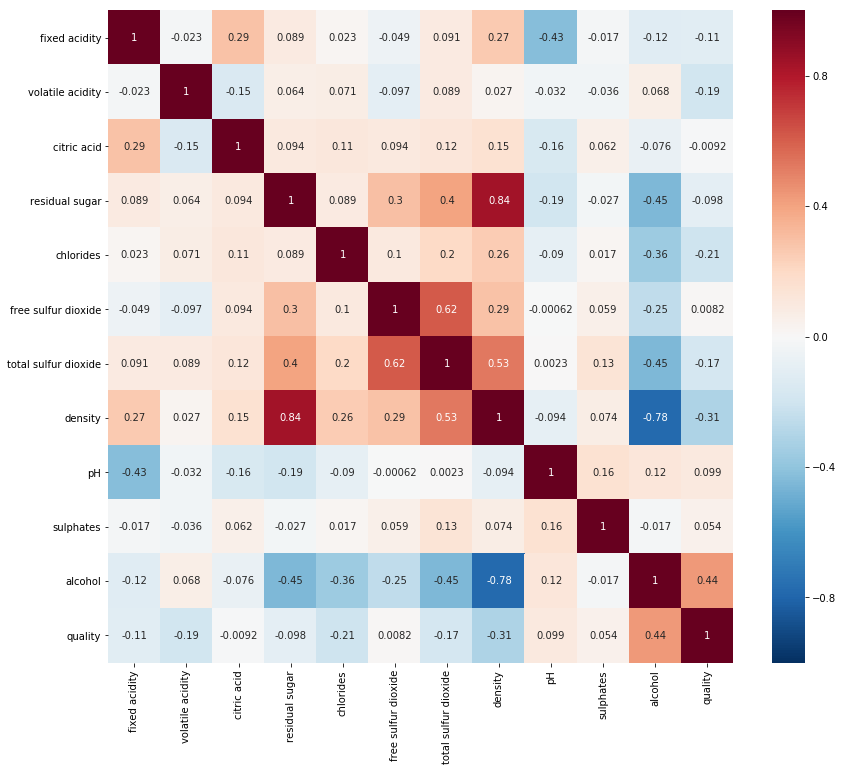

In [20]:
correlation = wine.corr()
# display(correlation)
fig3 = plt.figure()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
fig3.savefig('3')

In [21]:
plt.savefig('correlation')

<Figure size 432x288 with 0 Axes>

## 3.6- EDA Findings

*  All variables have outliers


*  Quality has most values concentrated in the categories 5, 6 and 7. Only a small proportion is in the categories [3, 4] and [8, 9] and none in the categories [1, 2] and 10.


*  Fixed acidity, volatile acidity and citric acid have outliers. If those outliers are eliminated distribution of the variables may be taken to be symmetric.


*  Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.


*  Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.


*  Mostly outliers are on the larger side.


*  Alcohol has an irregular shaped distribution but it does not have pronounced outliers.

# 4- Feature Engeneering

## 4.1- Feature elimination with using OLS results 

In [32]:
X = wine.iloc[:, :-1].values
y = wine.iloc[:, 11].values

In [33]:
X.shape

(4898, 11)

In [34]:
X = np.append(arr = np.ones((4898, 1)).astype(int), values = X, axis = 1)

In [35]:
X.shape

(4898, 12)

In [36]:
import statsmodels.api as sm
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:07:36   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.1928     18.804      7.987      0.000     113.328     187.057
x1             0.0655      0.021      3.139      0.002       0.025       0.106
x2            -1.8632      0.114    -16.373      0.000      -2.086      -1.640
x3             0.0221      0.096      0.231      0.818      -0.166       0.210
x4             0.0815      0.008     10.825      0.000       0.067       0.096
x5            -0.2473      0.547     -0.452      0.651      -1.319       0.824
x6             0.0037      0.001      4.422      0.000       0.002       0.005
x7            -0.0003      0.000     -0.756      0.450      -0.001       0.000
x8          -150.2842     19.075     -7.879      0.000    -187.679    -112.890
x9             0.6863      0.105      6.513      0.000       0.480       0.893
x10            0.6315      0.100      6.291      0.000       0.435       0.828
x11            0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4.2- Aditional feature elimination with EDA results 

In [37]:
# Removing the selected features according to EDA and OLS summary

In [38]:
X=X[:, [1, 7, 8, 9, 10, 11]]

## 4.3- Outliers Cleaning 

In [39]:
data=pd.read_csv('winequality-white.csv', delimiter=';')
for feature in data.keys():
    step=1.5*((np.percentile(data[feature], q=75))-(np.percentile(data[feature], q=25)))
    lower_bound=(np.percentile(data[feature], q=25))-step
    upper_bound=(np.percentile(data[feature], q=75))+step
    data.drop(list(data.loc[data[feature]<lower_bound].index)+
              list(data.loc[data[feature]>upper_bound].index), inplace=True)

In [40]:
data.shape # it shows that 1087 rows have been removed as outliers

(3811, 12)

## 4.4- Principal Component Analysis 

In [41]:
X3 = data.iloc[:, :-1].values
y3 = data.iloc[:, 11].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

/Users/onlyone/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)
explained_variance = pca.explained_variance_ratio_

In [43]:
explained_variance

array([0.31642212, 0.13626662, 0.1104322 , 0.09899664, 0.0870181 ,
       0.06967401, 0.06687368, 0.0533873 , 0.03500701, 0.02476153,
       0.00116078])

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

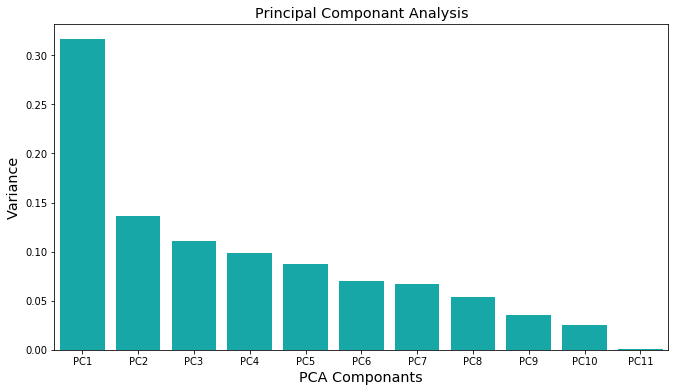

In [45]:
df_pca = pd.DataFrame({'var':explained_variance,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']})
fig = plt.figure(figsize=(11,6))
fig=sns.barplot(x='PC',y="var", data=df_pca, color="c")
plt.xlabel('PCA Componants', fontsize='x-large')
plt.ylabel('Variance', fontsize='x-large')
plt.title('Principal Componant Analysis', fontsize='x-large')

fig.savefig('PCA')

In [386]:
df_cumus = pd.DataFrame({'total_var':np.cumsum(df_pca['var'].values)})

In [387]:
df_cumus

,total_var
0,0.316422
1,0.452689
2,0.563121
3,0.662118
4,0.749136
5,0.818810
6,0.885683
7,0.939071
8,0.974078
9,0.998839


## 4.5- Linear Discriminant Analsis

In [462]:
X3 = data.iloc[:, :-1].values
y3 = data.iloc[:, 11].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train4 = sc.fit_transform(X_train4)
X_test4 = sc.transform(X_test4)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train4 = lda.fit_transform(X_train4, y_train4)
X_test4 = lda.transform(X_test4)

# 5- Modeling

## 5.1- K-NN Clasification 

### 5.1.1- KNN Without Tuning 

In [ ]:
wine=pd.read_csv('winequality-white.csv', delimiter=';')
X = wine.iloc[:, [1,7,8,9,10]].values
y = wine.iloc[:, 11].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)
print('confusion_matrix:\n {}\n\n\naccuracy_score: {}'.format(cm, ac))

confusion_matrix:
 [[  0   0   2   2   1   0]
 [  0   6   8   9   1   1]
 [  0   8 173 102   7   1]
 [  0   7 120 265  40   0]
 [  0   1  13  91  83   4]
 [  0   1   2  22   6   4]]


accuracy_score: 0.5418367346938775


### 5.1.2- KNN With Hyperparameter Tuning 

In [34]:
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1, 50)}, cv=5)
knn_cv.fit(X_train, y_train)
print("Accuracy: {}".format(knn_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

Accuracy: 0.6173469387755102
Tuned Model Parameters: {'n_neighbors': 1}


### 5.1.3- KNN with tuning + without outliers 

In [172]:
X2 = data.iloc[:, [1,7,8,9,10]].values
y2 = data.iloc[:, 11].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [454]:
knn_cv.fit(X_train2, y_train2)
print("Accuracy: {}".format(knn_cv.score(X_test2, y_test2)))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

Accuracy: 0.6225425950196593
Tuned Model Parameters: {'n_neighbors': 1}


### 5.1.4- KNN with PCA 

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)
explained_variance = pca.explained_variance_ratio_

knn_cv.fit(X_train3, y_train3)
print("Accuracy: {}".format(knn_cv.score(X_test3, y_test3)))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

Accuracy: 0.63564875491481
Tuned Model Parameters: {'n_neighbors': 1}


### 5.1.5- KNN with LDA 

In [458]:
lda = LDA(n_components = 2)
X_train4 = lda.fit_transform(X_train4, y_train4)
X_test4 = lda.transform(X_test4)

knn_cv.fit(X_train4, y_train4)
print("Accuracy: {}".format(knn_cv.score(X_test4, y_test4)))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

Accuracy: 0.6055045871559633
Tuned Model Parameters: {'n_neighbors': 1}


### 5.1.6- Plotting the effect of the hyperparameter 

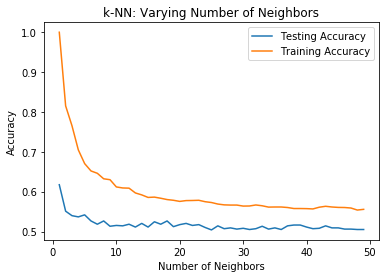

In [229]:
neighbors = np.arange(1, 50) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 5.2- Support Vector Machine (SVM) 

### 5.2.1- SVM Without Tuning 

In [36]:

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)
print('confusion_matrix:\n {}\n\n\naccuracy_score: {}'.format(cm, ac))

confusion_matrix:
 [[  0   0   1   4   0   0]
 [  0   0  12  13   0   0]
 [  0   0 154 137   0   0]
 [  0   0  93 339   0   0]
 [  0   0  13 179   0   0]
 [  0   0   2  33   0   0]]


accuracy_score: 0.503061224489796


### 5.2.2- SVM With Hyperparameter Tuning 

In [135]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm=SVC(kernel='linear')
svm_cv = GridSearchCV(svm, param_grid, cv=5)

# Fit to the training set
svm_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = svm_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(svm_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(svm_cv.best_params_))

Accuracy: 0.5040816326530613
Tuned Model Parameters: {'C': 0.1, 'gamma': 0.001}


### 5.2.3- SVM with tuning + without outliers 

In [136]:
# Fit to the training set
svm_cv.fit(X_train2, y_train2)

# Predict the labels of the test set: y_pred
y_pred = svm_cv.predict(X_test2)

# Compute and print metrics
print("Accuracy: {}".format(svm_cv.score(X_test2, y_test2)))
print("Tuned Model Parameters: {}".format(svm_cv.best_params_))

Accuracy: 0.5307994757536042
Tuned Model Parameters: {'C': 1, 'gamma': 0.001}


### 5.2.4- SVM with PCA 

In [463]:
# Fit to the training set
svm_cv.fit(X_train3, y_train3)

# Predict the labels of the test set: y_pred
y_pred = svm_cv.predict(X_test3)

# Compute and print metrics
print("Accuracy: {}".format(svm_cv.score(X_test3, y_test3)))
print("Tuned Model Parameters: {}".format(svm_cv.best_params_))

Accuracy: 0.546526867627785
Tuned Model Parameters: {'C': 0.1, 'gamma': 0.001}


### 5.2.5- SVM with LDA 

In [472]:
# Fit to the training set
svm_cv.fit(X_train4, y_train4)

# Predict the labels of the test set: y_pred
y_pred = svm_cv.predict(X_test4)

# Compute and print metrics
print("Accuracy: {}".format(svm_cv.score(X_test4, y_test4)))
print("Tuned Model Parameters: {}".format(svm_cv.best_params_))

Accuracy: 0.5307994757536042
Tuned Model Parameters: {'C': 1, 'gamma': 0.001}


## 5.3- Kernel SVM 

### 5.3.1- Kernel SVM Without Tuning  

In [39]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)
print('confusion_matrix:\n {}\n\n\naccuracy_score: {}'.format(cm, ac))

confusion_matrix:
 [[  0   0   2   3   0   0]
 [  0   0  11  14   0   0]
 [  0   0 145 146   0   0]
 [  0   0  84 326  22   0]
 [  0   0   5 153  34   0]
 [  0   0   0  27   8   0]]


accuracy_score: 0.5153061224489796


### 5.3.2- Kernel SVM With Hyperparameter Tuning 

In [156]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm=SVC(kernel='rbf')
ksvm_cv = GridSearchCV(svm, param_grid, cv=5)

# Fit to the training set
ksvm_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = ksvm_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(ksvm_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(ksvm_cv.best_params_))

Accuracy: 0.5724489795918367
Tuned Model Parameters: {'C': 10, 'gamma': 1}


### 5.3.3- Kernel SVM with tuning + without outliers 

In [157]:
# Fit to the training set
ksvm_cv.fit(X_train2, y_train2)

# Predict the labels of the test set: y_pred
y_pred = ksvm_cv.predict(X_test2)

# Compute and print metrics
print("Accuracy: {}".format(ksvm_cv.score(X_test2, y_test2)))
print("Tuned Model Parameters: {}".format(ksvm_cv.best_params_))

Accuracy: 0.6186107470511141
Tuned Model Parameters: {'C': 10, 'gamma': 1}


### 5.3.4- Kernel SVM with PCA 

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)
explained_variance = pca.explained_variance_ratio_
# Fit to the training set

ksvm_cv.fit(X_train3, y_train3)

# Predict the labels of the test set: y_pred
y_pred = ksvm_cv.predict(X_test3)

# Compute and print metrics
print("Accuracy: {}".format(ksvm_cv.score(X_test3, y_test3)))
print("Tuned Model Parameters: {}".format(ksvm_cv.best_params_))

Accuracy: 0.6487549148099607
Tuned Model Parameters: {'C': 10, 'gamma': 1}


### 5.3.5- Kernel SVM with LDA 

In [473]:
ksvm_cv.fit(X_train4, y_train4)

# Predict the labels of the test set: y_pred
y_pred = ksvm_cv.predict(X_test4)

# Compute and print metrics
print("Accuracy: {}".format(ksvm_cv.score(X_test4, y_test4)))
print("Tuned Model Parameters: {}".format(ksvm_cv.best_params_))

Accuracy: 0.5439056356487549
Tuned Model Parameters: {'C': 1, 'gamma': 1}


## 5.4- Naive Bayes 

### 5.4- With outliers 

In [169]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nb.predict(X_test)

# Making the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)
print('confusion_matrix:\n {}\n\n\naccuracy_score: {}'.format(cm, ac))

confusion_matrix:
 [[  0   0   2   3   0   0]
 [  0   3   9  11   2   0]
 [  0   6 180  98   6   1]
 [  0   4 135 219  72   2]
 [  0   0  23  99  65   5]
 [  0   1   3  11  20   0]]


accuracy_score: 0.47653061224489796


### 5.4.2- without outliers 

In [173]:
nb.fit(X_train2, y_train2)

# Predicting the Test set results
y_pred = nb.predict(X_test2)

# Accuracy score
ac=accuracy_score(y_test2, y_pred)
print('accuracy_score: {}'.format(ac))

accuracy_score: 0.5294888597640891


### 5.4.3- Naive Bayes with PCA 

In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)
explained_variance = pca.explained_variance_ratio_

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train3, y_train3)

# Predicting the Test set results
y_pred = nb.predict(X_test3)

# Accuracy score
ac=accuracy_score(y_test3, y_pred)
print('accuracy_score: {}'.format(ac))

accuracy_score: 0.5583224115334207


### 5.4.4- Naive Bayes with LDA 

In [474]:
nb = GaussianNB()
nb.fit(X_train4, y_train4)

# Predicting the Test set results
y_pred = nb.predict(X_test4)

# Accuracy score
ac=accuracy_score(y_test4, y_pred)
print('accuracy_score: {}'.format(ac))

accuracy_score: 0.5386631716906947


## 5.5- Decision Tree Classification 

### 5.5.1- Without Tuning 

In [182]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtree.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dtree.predict(X_test)

# Making the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)
print('confusion_matrix:\n {}\n\n\naccuracy_score: {}'.format(cm, ac))

confusion_matrix:
 [[  0   0   2   2   1   0   0]
 [  0   7   6   9   3   0   0]
 [  1  14 183  79  12   2   0]
 [  4   8  84 270  60   6   0]
 [  0   1  13  47 118  13   0]
 [  1   1   1   5   8  18   1]
 [  0   0   0   0   0   0   0]]


accuracy_score: 0.6081632653061224


### 5.5.2- With Hyperparameter Tuning 

In [183]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint=True),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
dtree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
dtree_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = dtree_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtree_cv.best_params_))
print("Best score is {}".format(dtree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 21.0, 'min_samples_leaf': 1}
Best score is 0.5714650331801939


### 5.5.3- Decision Tree without outliers 

In [184]:
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtree.fit(X_train2, y_train2)

# Predicting the Test set results
y_pred = dtree.predict(X_test2)

# Making the Confusion Matrix
cm=confusion_matrix(y_test2, y_pred)
ac=accuracy_score(y_test2, y_pred)
print('accuracy_score: {}'.format(ac))

accuracy_score: 0.6120576671035387


### 5.5.4- Decision Tree with PCA 

In [185]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)
explained_variance = pca.explained_variance_ratio_

dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtree.fit(X_train3, y_train3)

# Predicting the Test set results
y_pred = dtree.predict(X_test3)

# Making the Confusion Matrix
cm=confusion_matrix(y_test3, y_pred)
ac=accuracy_score(y_test3, y_pred)
print('accuracy_score: {}'.format(ac))

accuracy_score: 0.6159895150720839


### 5.5.5- Decision Tree with LDA 

In [475]:
dtree.fit(X_train4, y_train4)

# Predicting the Test set results
y_pred = dtree.predict(X_test4)

# Making the Confusion Matrix
ac=accuracy_score(y_test4, y_pred)
print('accuracy_score: {}'.format(ac))

accuracy_score: 0.6304062909567497


## 5.6- Random Forest Classification 

### 5.6.1- Random Forest Without Tuning 

In [53]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)
print('confusion_matrix:\n {}\n\n\naccuracy_score: {}'.format(cm, ac))

confusion_matrix:
 [[  0   1   1   3   0   0]
 [  0   7  12   6   0   0]
 [  0   9 192  86   4   0]
 [  0   4  86 296  46   0]
 [  0   0   5  75 105   7]
 [  0   0   0  13   7  15]]


accuracy_score: 0.6275510204081632


### 5.6.2- Random Forest With Hyperparameter Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

rfc = RandomForestClassifier()
rs = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit to the training set
rs.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rs.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(rs.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(rs.best_params_))

### 5.6.3- Random Forest with tuning + without outliers 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

rfc = RandomForestClassifier()
rs = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit to the training set
rs.fit(X_train2, y_train2)

# Predict the labels of the test set: y_pred
y_pred = rs.predict(X_test2)

# Compute and print metrics
print("Accuracy: {}".format(rs.score(X_test2, y_test2)))
print("Tuned Model Parameters: {}".format(rs.best_params_))

### 5.6.4- Random Forest with PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)
explained_variance = pca.explained_variance_ratio_

# Fit to the training set
rs.fit(X_train3, y_train3)

# Predict the labels of the test set: y_pred
y_pred = rs.predict(X_test3)

# Compute and print metrics
print("Accuracy: {}".format(rs.score(X_test3, y_test3)))
print("Tuned Model Parameters: {}".format(rs.best_params_))

### 5.6.5- Random Forest with LDA 

In [ ]:
# Fit to the training set
rs.fit(X_train4, y_train4)

# Predict the labels of the test set: y_pred
y_pred = rs.predict(X_test4)

# Compute and print metrics
print("Accuracy: {}".format(rs.score(X_test4, y_test4)))
print("Tuned Model Parameters: {}".format(rs.best_params_))

# 6- Conclusion

## Summary of Scores 

In [478]:
results={'KNN': [0.5418, 0.6173, 0.6225, 0.6356, 0.6055], 'SVM': [0.5030, 0.5040, 0.5307, 0.5465, 0.5307], 
         'KSVM': [0.5153, 0.5744, 0.6186, 0.6487, 0.5439], 'NB': [0.4765, 0.4765, 0.5294, 0.5583, 0.5386], 
         'DTREE': [0.6081, 0.5709, 0.6120, 0.6159, 0.6304], 'RFOREST': [0.6275, 0.6591, 0.6907, 0.6736, 0.6408]}

In [479]:
df=pd.DataFrame.from_dict(results, orient='index')
df.columns=['default', 'tuned', 'no_outliers', 'pca', 'lda']

In [486]:
# Computing the contribution of the hyperparameter tuning to the scores

list1=[]
for i in df.index:
    a=df.tuned[i]-df.default[i]
    if a>0:
        list1.append(float("%.4f" % a))
    else:
        list1.append(0)

df["tuning_cont_(%)"]=list1

In [487]:
# Computing the contribution of the outliers cleaning to the scores

list2=[]
for i in df.index:
    b=df.no_outliers[i]-df.tuned[i]
    if b>0:
        list2.append(float("%.4f" % b))
    else:
        list2.append(0)        
df["no_outliers_cont_(%)"]=list2

In [488]:
# Computing the contribution of the "Principal Component Analysis" to the scores

list3=[]
for i in df.index:
    c=df.pca[i]-df.no_outliers[i]
    if c>0:
        list3.append(float("%.4f" % c))
    else:
        list3.append(0)        
df["pca_cont_(%)"]=list3

In [489]:
# Computing the contribution of the "Linear Discriminant Analysis" to the scores

list5=[]
for i in df.index:
    f=df.lda[i]-df.no_outliers[i]
    if f>0:
        list5.append(float("%.4f" % f))
    else:
        list5.append(0)        
df["lda_cont_(%)"]=list5

In [490]:
# Computing the totol improvement on the scores

list4=[]
for i in df.index:
    d=max(df.pca[i], df.no_outliers[i], df.default[i], df.tuned[i], df.lda[i])
    e=(d/df.default[i])-1
    list4.append(float("%.4f" % e))
df["total_improvement_(%)"]=list4     

In [495]:
df

,default,tuned,no_outliers,pca,lda,total_improvement_(%),tuning_cont_(%),no_outliers_cont_(%),pca_cont_(%),lda_cont_(%)
KNN,0.5418,0.6173,0.6225,0.6356,0.6055,0.1731,0.0755,0.0052,0.0131,0.0000
SVM,0.5030,0.5040,0.5307,0.5465,0.5307,0.0865,0.0010,0.0267,0.0158,0.0000
KSVM,0.5153,0.5744,0.6186,0.6487,0.5439,0.2589,0.0591,0.0442,0.0301,0.0000
NB,0.4765,0.4765,0.5294,0.5583,0.5386,0.1717,0.0000,0.0529,0.0289,0.0092
DTREE,0.6081,0.5709,0.6120,0.6159,0.6304,0.0367,0.0000,0.0411,0.0039,0.0184
RFOREST,0.6275,0.6591,0.6907,0.6736,0.6408,0.1007,0.0316,0.0316,0.0000,0.0000


In [522]:
df.columns

Index(['default', 'tuned', 'no_outliers', 'pca', 'lda',
       'total_improvement_(%)', 'tuning_cont_(%)', 'no_outliers_cont_(%)',
       'pca_cont_(%)', 'lda_cont_(%)'],
      dtype='object')

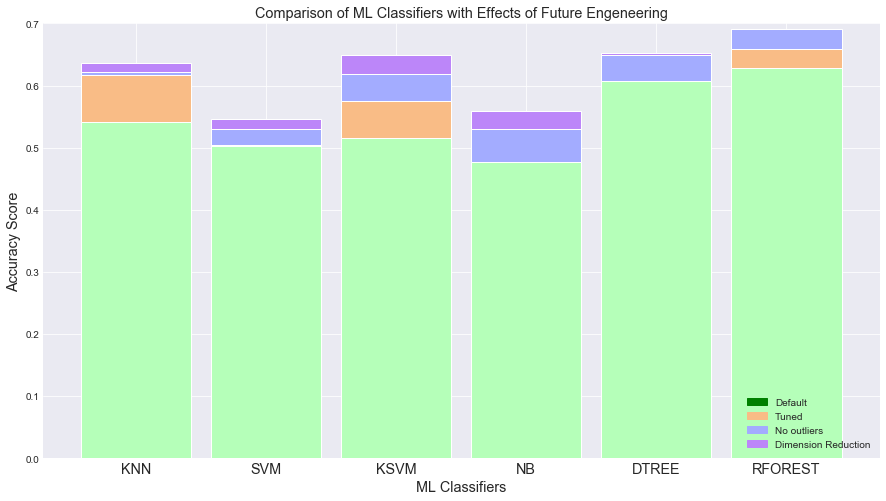

In [517]:
import matplotlib.patches as mpatches

r = [0,1,2,3,4,5]

# From raw value to percentage
A=df.iloc[:,0]
B=df.iloc[:,6]
C=df.iloc[:,7]
D=df.iloc[:,8]
# plot
barWidth = 0.85
names = ('KNN', 'SVM', 'KSVM', 'NB', 'DTREE', 'RFOREST')
fig = plt.figure(figsize=(15,8))
# Create green Bars
plt.bar(r, A, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, B, bottom=A, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, C, bottom=[i+j for i,j in zip(A, B)], color='#a3acff', edgecolor='white', width=barWidth)
# Create purple Bars
plt.bar(r, D, bottom=[i+j+k for i,j,k in zip(A, B, C)], color='#bc86f9', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names, fontsize='x-large')
plt.yticks(np.arange(0,0.75,0.1))
plt.xlabel("ML Classifiers", fontsize='x-large')
plt.ylabel("Accuracy Score", fontsize='x-large')
plt.title("Comparison of ML Classifiers with Effects of Future Engeneering", fontsize='x-large')

import matplotlib.patches as mpatches
green = mpatches.Patch(color='g', label='Default')
orange = mpatches.Patch(color='#f9bc86', label='Tuned')
blue = mpatches.Patch(color='#a3acff', label='No outliers')
purple = mpatches.Patch(color='#bc86f9', label='Dimension Reduction')
plt.legend(handles=[green, orange, blue, purple], loc=4)

# Show graphic
plt.show()

In [518]:
fig.savefig('Comparision of ML Models2')

In [440]:
df2

,classifier,default,tuned,no_outliers,pca
0,KNN,0.5418,0.6173,0.6225,0.6356
1,SVM,0.5030,0.5040,0.5307,0.5203
2,KSVM,0.5153,0.5744,0.6186,0.6487
3,NB,0.4765,0.4765,0.5294,0.5583
4,DTREE,0.6081,0.5709,0.6120,0.6159
5,RFOREST,0.6275,0.6591,0.6907,0.6736


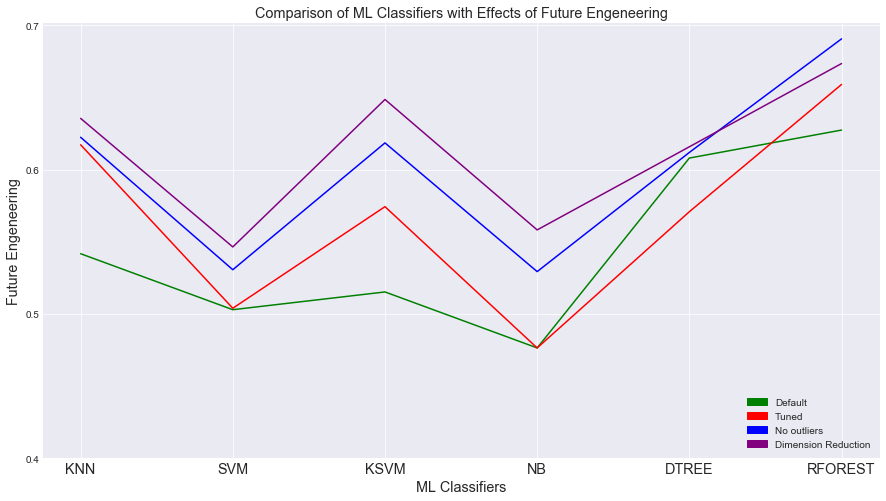

In [514]:
# Data
r = [0,1,2,3,4,5]

# From raw value to percentage
A=df.iloc[:,0]
B=df.iloc[:,1]
C=df.iloc[:,2]
D=df.iloc[:,3]
# plot
barWidth = 0.85
names = ('KNN', 'SVM', 'KSVM', 'NB', 'DTREE', 'RFOREST')
fig = plt.figure(figsize=(15,8))
# Create green Bars
plt.plot(r, A, color='green')
# Create orange Bars
plt.plot(r, B, color='red')
# Create blue Bars
plt.plot(r, C, color='blue')
# Create purple Bars
plt.plot(r, D, color='purple')
 
# Custom x axis
plt.xticks(r, names, fontsize='x-large')
plt.yticks(np.arange(0.4,0.75,0.1))
plt.xlabel("ML Classifiers", fontsize='x-large')
plt.ylabel("Future Engeneering", fontsize='x-large')
plt.title("Comparison of ML Classifiers with Effects of Future Engeneering", fontsize='x-large')

green = mpatches.Patch(color='green', label='Default')
orange = mpatches.Patch(color='red', label='Tuned')
blue = mpatches.Patch(color='blue', label='No outliers')
purple = mpatches.Patch(color='purple', label='Dimension Reduction')
plt.legend(handles=[green, orange, blue, purple], loc=4)

# Show graphic
plt.show()

# Conclusion
In this study, wine quality is tried to modeled with wine attributes (i) Fixed acidity (ii) Volatile acidity (iii) Citric acid (iv) Residual sugar (v) Chlorides (vi) Free sulfur dioxide (vii) Total sulfur dioxide (viii) Density (ix) pH (x) Sulfates (xi) Alcohol.

With the exception of alcohol, none of the attributes showed significant correlations to wine quality, indicating that they in fact cover different aspects of wine quality. However, as expected, no single predictor variable is able to fully describe all aspects of wine quality.

Even after cleaning the outliers and applied dimensional reduction, the best prediction was 69% which is with random forest. We also reached below findings:
    •	We observed that hyperparameter tuning has an improving effect on scores up to 13%.
    •	Cleaning Outliers made positive effects over all models.
    •	Principal Component Analysis generally made positive effect but did't affect Random Forest Model.

Why our highest score is not so high; 
    •	The first thing the distribution of the target variable. Quality has most values concentrated in the categories 5, 6 and 7. Only a small proportion is in the categories [3, 4] and [8, 9] and none in the categories [1, 2] and 10. Small proportions decrease the chance of predictions of these levels. 
    •	Relationships between the predictor variables and the target variable. There is no strong relationship between quality and anyone of the predictors. So, this makes difficult to predict. 

In conclusion, however the best score is not so high, we reached the best score in regards of the data in hand.


# Next Step
Without full knowledge of each wine’s we can’t get high prediction scores. The results of this study can only serve as an initial look at quality. It is therefore necessary to validate the reported findings on a more extensive sample set, including, but not limited to, retail price and the year the wine was made.
